### Problem Statement.
<b>This project uses a simulated dataset to explore what factors impact remote worker productivity. The goal is to build a model that can predict productivity levels (High, Medium, Low) accurately and identify which features play the biggest role in driving productivity.</b>

### Data collection
The data was collected from kaggle from the following link: https://www.kaggle.com/datasets/ziya07/remote-worker-productivity-dataset

### Description of The Data
##### The data has 16 features and 1 label which is productivity score of 1000 observations.

# Initializing the EDA process.

In [1]:
#Installing necessary libraries for EDA.
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Reading the data file.
df = pd.read_csv('./data/remote_worker_productivity_1000.csv')

#Looking into first 10 entities.
df.head(10)

worker_id location_type industry_sector  age  experience_years  \
0     W0001       Village      Healthcare   23                26   
1     W0002          City      Healthcare   27                27   
2     W0003       Village          Retail   30                 8   
3     W0004       Village         Finance   54                19   
4     W0005          City       Education   46                 1   
5     W0006          City         Finance   34                29   
6     W0007       Village         Finance   30                14   
7     W0008          Town      Healthcare   34                20   
8     W0009       Village         Finance   52                13   
9     W0010       Village              IT   32                 8   

   average_daily_work_hours  break_frequency_per_day  task_completion_rate  \
0                      7.45                        1             66.377024   
1                      9.82                        3             88.226501   
2                      7.38                        2             67.004170   
3                      8.37                        1             66.004424   
4                      7.51                        4             91.468942   
5                      7.98                        5             78.688628   
6                      7.85                        5             96.705405   
7                      6.99                        3             70.072440   
8                      8.81                        1             78.349125   
9                      8.36                        4             81.041114   

   late_task_ratio  calendar_scheduled_usage  focus_time_minutes  \
0         0.254624                 55.496926               106.0   
1         0.173382                 66.496755               141.0   
2         0.351835                 41.367064                92.0   
3         0.347840                 51.086805                94.0   
4         0.085582                 93.618344               202.0   
5         0.105673                 62.337990               160.0   
6         0.031835                 87.624599               210.0   
7         0.378185                 37.451617                94.0   
8         0.162282                 71.686734               137.0   
9         0.134488                 69.802972               121.0   

   tool_usage_frequency  automated_task_count  AI_assisted_planning  \
0                    19                    13                     0   
1                     5                     1                     1   
2                     4                     4                     0   
3                    17                     9                     1   
4                    14                     8                     0   
5                     5                    11                     0   
6                    18                     2                     0   
7                     0                     7                     0   
8                     0                     3                     1   
9                    12                     5                     1   

   real_time_feedback_score productivity_label  productivity_score  
0                        80                Low               32.31  
1                        83             Medium               41.09  
2                        81                Low               25.69  
3                        84                Low               31.98  
4                        64               High               48.19  
5                        81             Medium               36.08  
6                        55               High               49.91  
7                        94                Low               24.77  
8                        70             Medium               38.28  
9                        82             Medium               41.38

<i>Gathering generic information about the data</i>

In [3]:
#The shape of the data
shape = df.shape
print(f"The data contains:\ninstances: {shape[0]}\nfeatures: {shape[1]}")

The data contains:
instances: 1000
features: 17


In [4]:
#Looking into the column names, dtypes, and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   worker_id                 1000 non-null   object 
 1   location_type             1000 non-null   object 
 2   industry_sector           1000 non-null   object 
 3   age                       1000 non-null   int64  
 4   experience_years          1000 non-null   int64  
 5   average_daily_work_hours  1000 non-null   float64
 6   break_frequency_per_day   1000 non-null   int64  
 7   task_completion_rate      1000 non-null   float64
 8   late_task_ratio           1000 non-null   float64
 9   calendar_scheduled_usage  1000 non-null   float64
 10  focus_time_minutes        1000 non-null   float64
 11  tool_usage_frequency      1000 non-null   int64  
 12  automated_task_count      1000 non-null   int64  
 13  AI_assisted_planning      1000 non-null   int64  
 14  real_time

##### There are no null values.

In [5]:
#Looking into the numeric summary of the dataset.
df.describe().round(2)

age  experience_years  average_daily_work_hours  \
count  1000.00           1000.00                   1000.00   
mean     40.46             17.62                      7.49   
std      10.86              9.84                      1.19   
min      22.00              1.00                      3.61   
25%      31.00              9.00                      6.70   
50%      41.00             18.00                      7.51   
75%      49.00             26.00                      8.30   
max      59.00             34.00                     11.25   

       break_frequency_per_day  task_completion_rate  late_task_ratio  \
count                  1000.00               1000.00          1000.00   
mean                      2.96                 81.26             0.18   
std                       1.43                 11.94             0.12   
min                       1.00                 60.12             0.00   
25%                       2.00                 70.34             0.07   
50%                       3.00                 82.29             0.17   
75%                       4.00                 92.31             0.28   
max                       5.00                 99.96             0.40   

       calendar_scheduled_usage  focus_time_minutes  tool_usage_frequency  \
count                   1000.00             1000.00               1000.00   
mean                      67.88              149.68                  9.37   
std                       19.72               52.19                  5.85   
min                       30.03               60.00                  0.00   
25%                       50.82              105.00                  4.00   
50%                       69.14              148.50                  9.00   
75%                       85.56              196.25                 15.00   
max                       99.99              239.00                 19.00   

       automated_task_count  AI_assisted_planning  real_time_feedback_score  \
count               1000.00                1000.0                   1000.00   
mean                   7.03                   0.5                     74.11   
std                    4.24                   0.5                     14.32   
min                    0.00                   0.0                     50.00   
25%                    3.00                   0.0                     62.00   
50%                    7.00                   1.0                     74.00   
75%                   11.00                   1.0                     86.00   
max                   14.00                   1.0                     99.00   

       productivity_score  
count             1000.00  
mean                39.08  
std                  8.68  
min                 20.56  
25%                 30.39  
50%                 39.47  
75%                 47.63  
max                 55.20

##### It is a nirmally distributed data, the difference between mean and median are marginal.

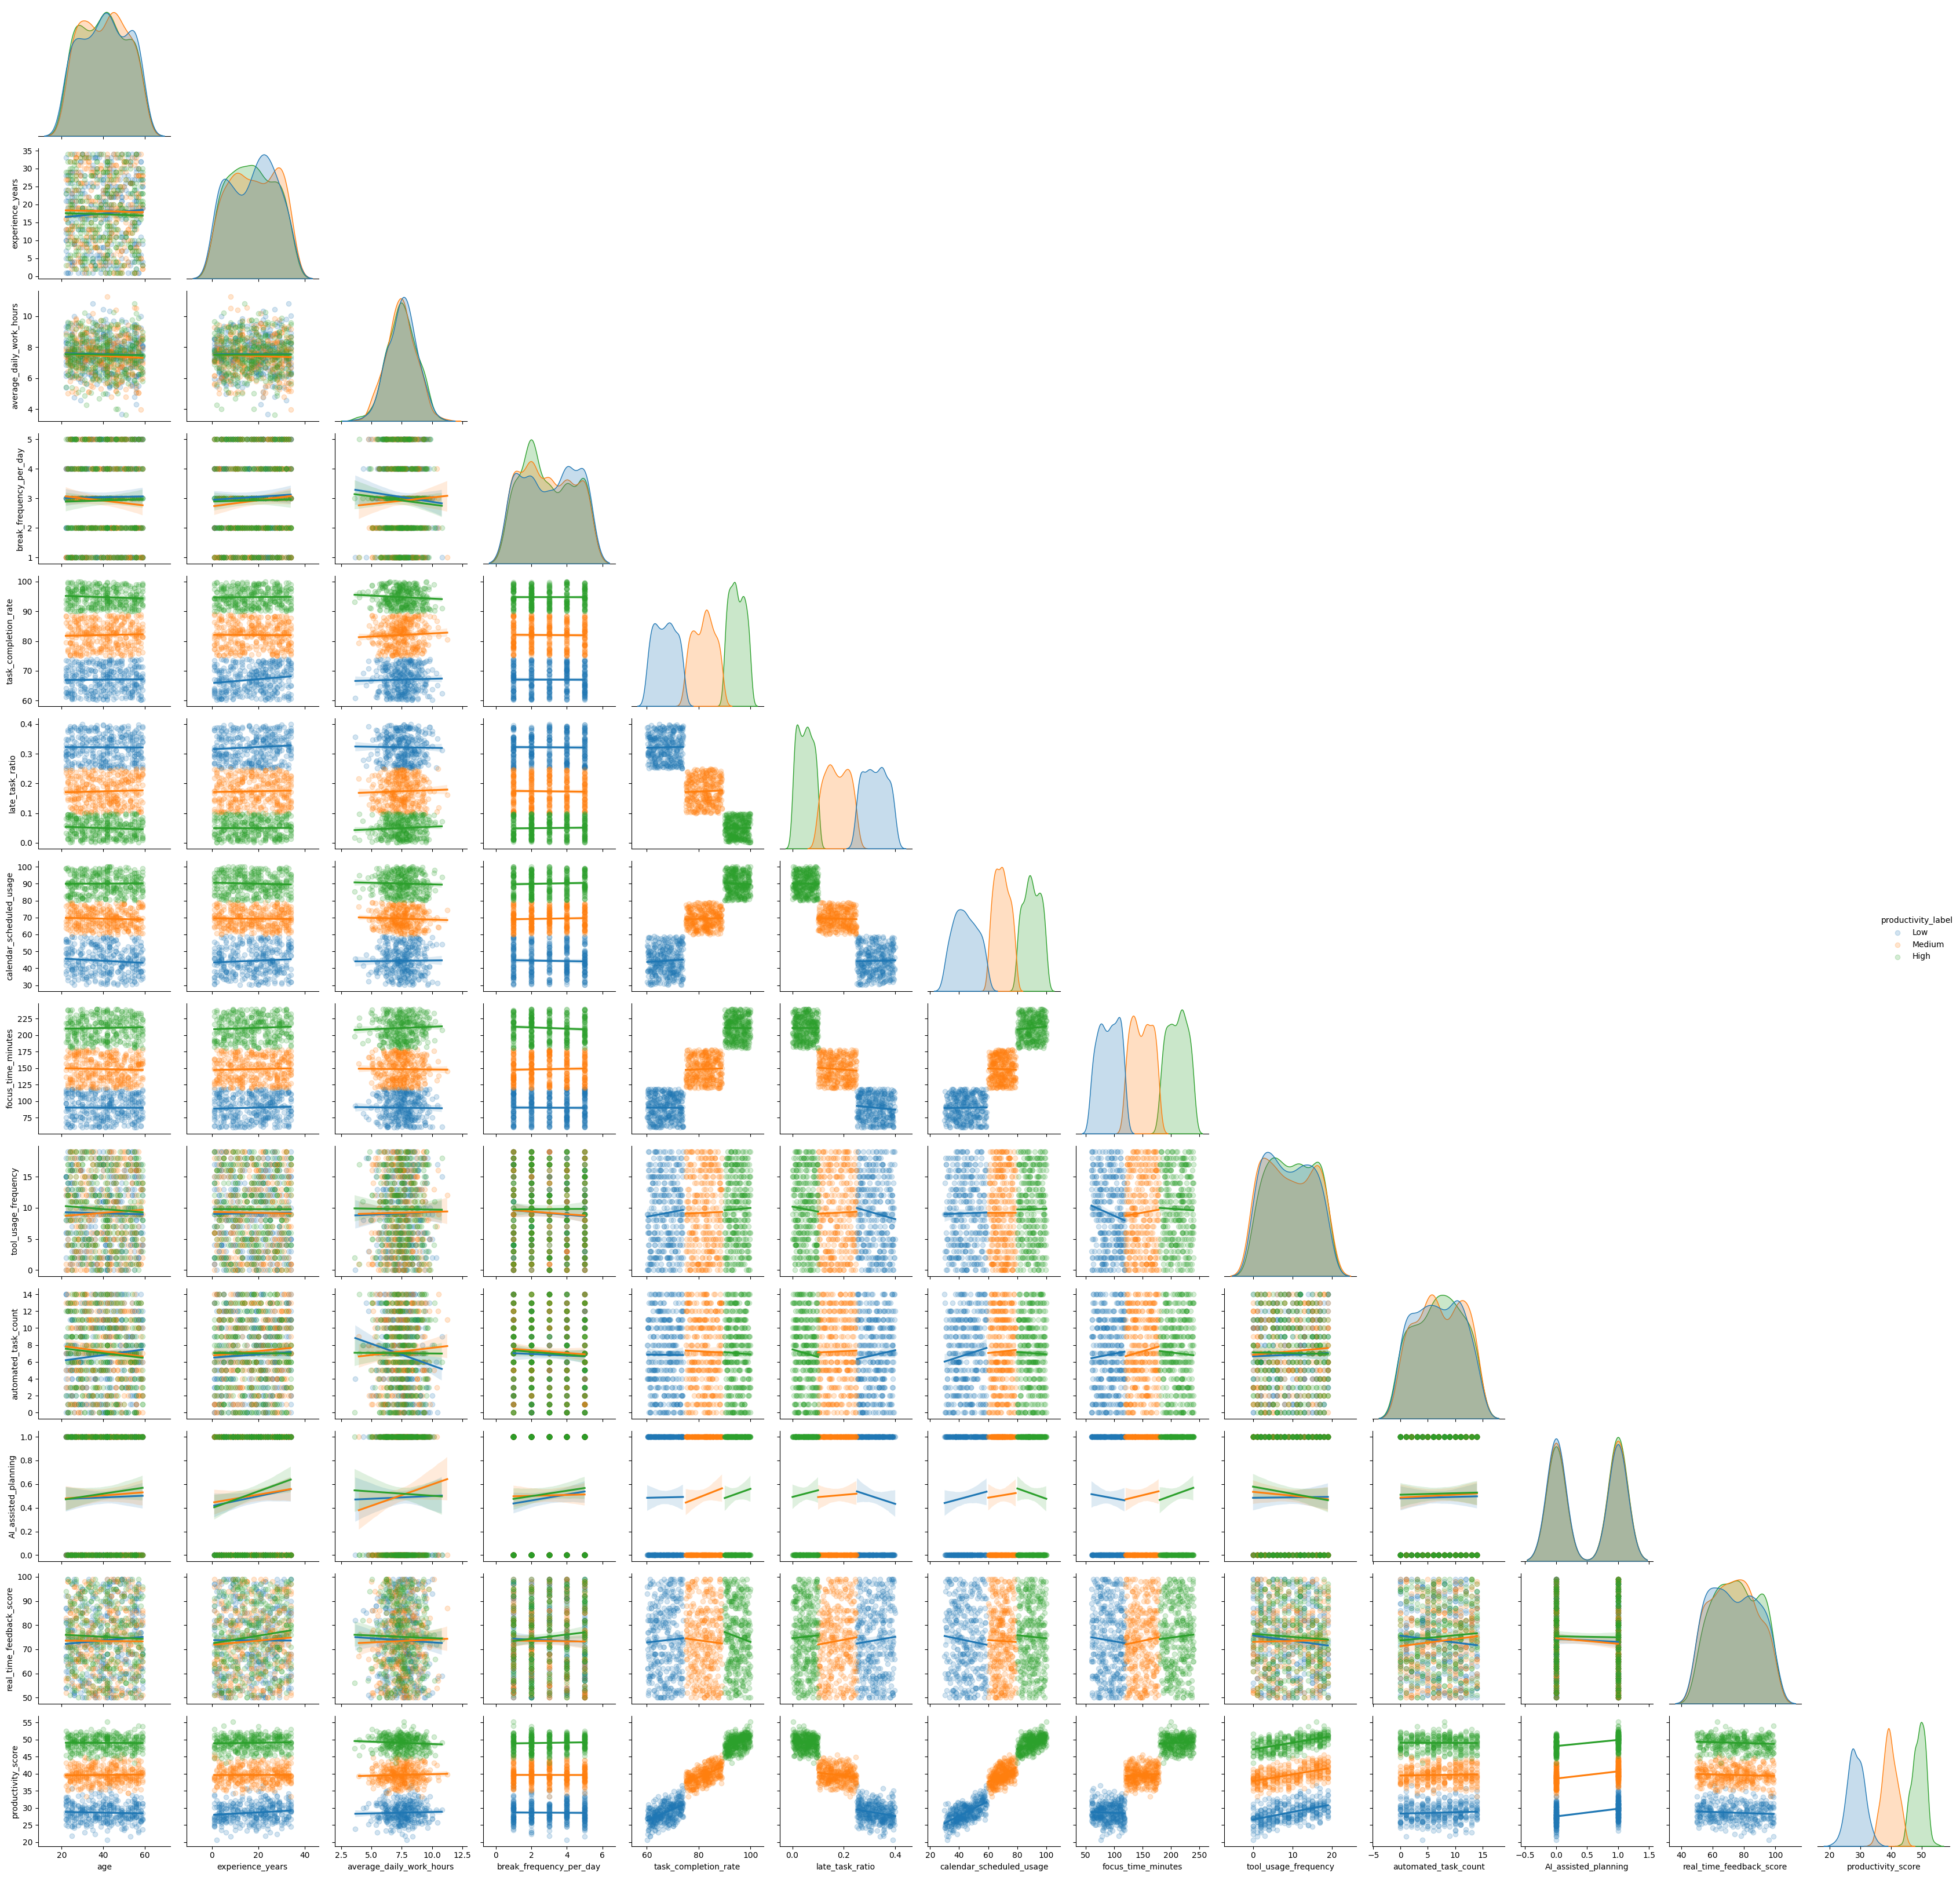

In [40]:
#Getting an overview of the data.
sns.pairplot(df, kind='reg', corner=True, hue='productivity_label', plot_kws={'scatter_kws':{'alpha':0.2}})
plt.tight_layout()
plt.show()

##### Looking into the pairplot I can clearly see a cyclical pattern here.

<Figure size 2000x1000 with 0 Axes>

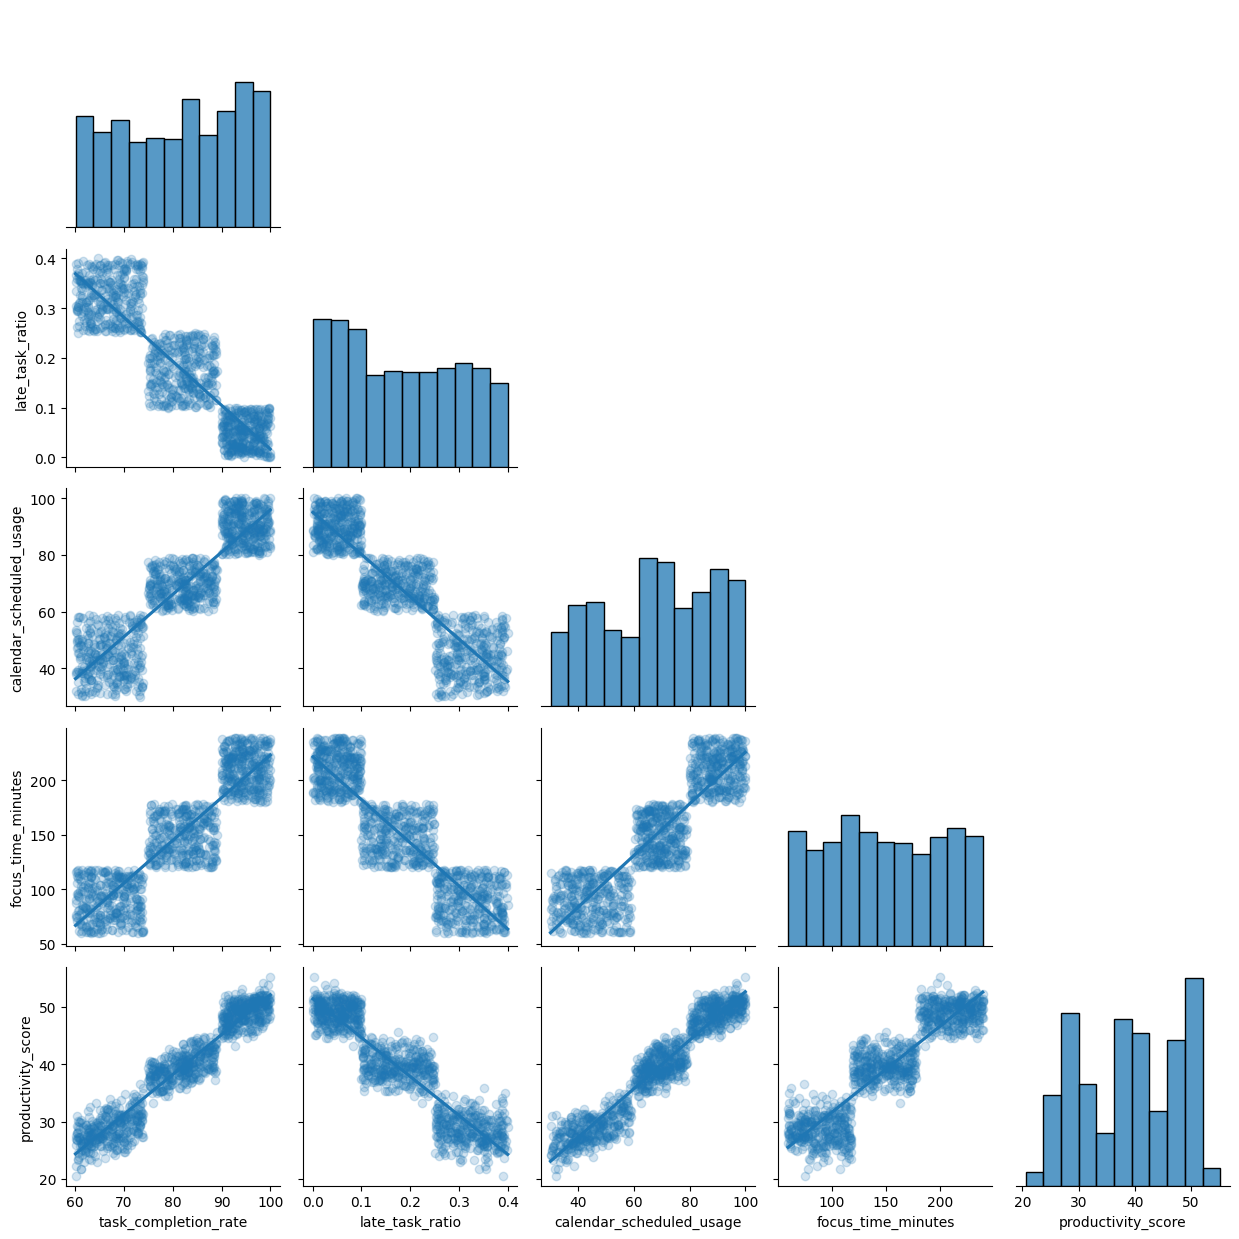

In [32]:
#Visualizing the cyclical pattern more closely
plt.figure(figsize=(20,10))
sns.pairplot(df, 
             kind='reg',
             corner=True, 
             vars=['task_completion_rate', 'late_task_ratio', 
                   'calendar_scheduled_usage', 'focus_time_minutes', 
                   'productivity_score'],
             plot_kws={'scatter_kws': {'alpha': 0.2}})
plt.tight_layout()
plt.show()

##### Why are the values like boxes.

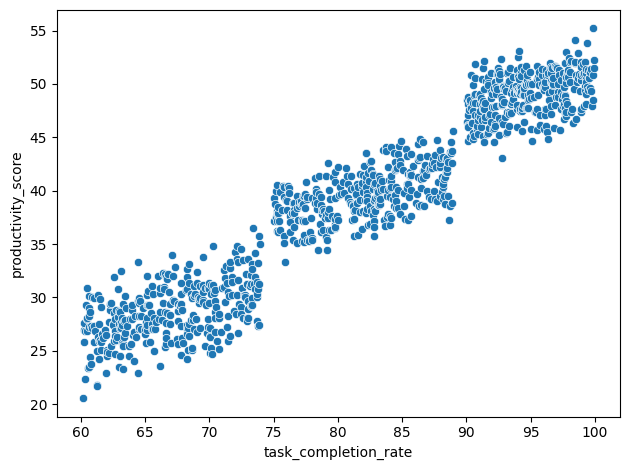

In [8]:
sns.scatterplot(data=df.groupby('task_completion_rate')['productivity_score'].mean().reset_index(), x='task_completion_rate', y='productivity_score')
plt.tight_layout()
plt.show()

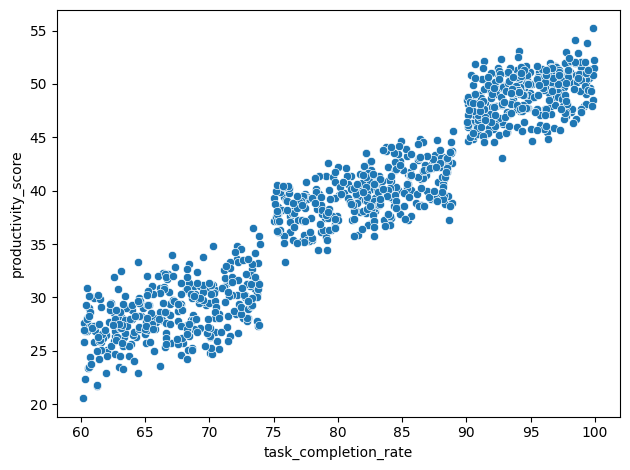

In [9]:
#Looking closely to understand why are the datas are in boxes.
sns.scatterplot(data=df, x='task_completion_rate', y='productivity_score')
plt.tight_layout()
plt.show()

<Axes: xlabel='task_completion_rate', ylabel='Count'>

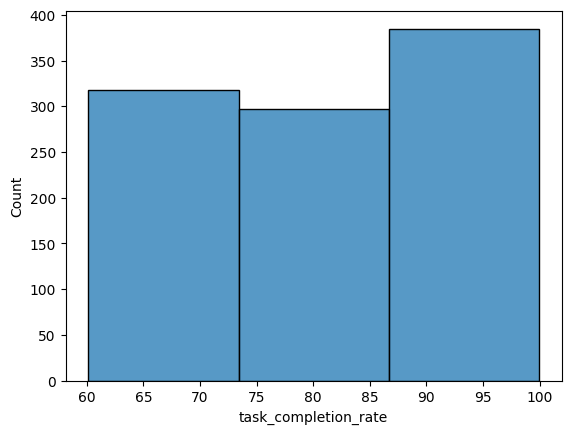

In [10]:
sns.histplot(data=df, x='task_completion_rate', bins=3)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'experience_years'}>,
        <Axes: title={'center': 'average_daily_work_hours'}>,
        <Axes: title={'center': 'break_frequency_per_day'}>],
       [<Axes: title={'center': 'task_completion_rate'}>,
        <Axes: title={'center': 'late_task_ratio'}>,
        <Axes: title={'center': 'calendar_scheduled_usage'}>,
        <Axes: title={'center': 'focus_time_minutes'}>],
       [<Axes: title={'center': 'tool_usage_frequency'}>,
        <Axes: title={'center': 'automated_task_count'}>,
        <Axes: title={'center': 'AI_assisted_planning'}>,
        <Axes: title={'center': 'real_time_feedback_score'}>],
       [<Axes: title={'center': 'productivity_score'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

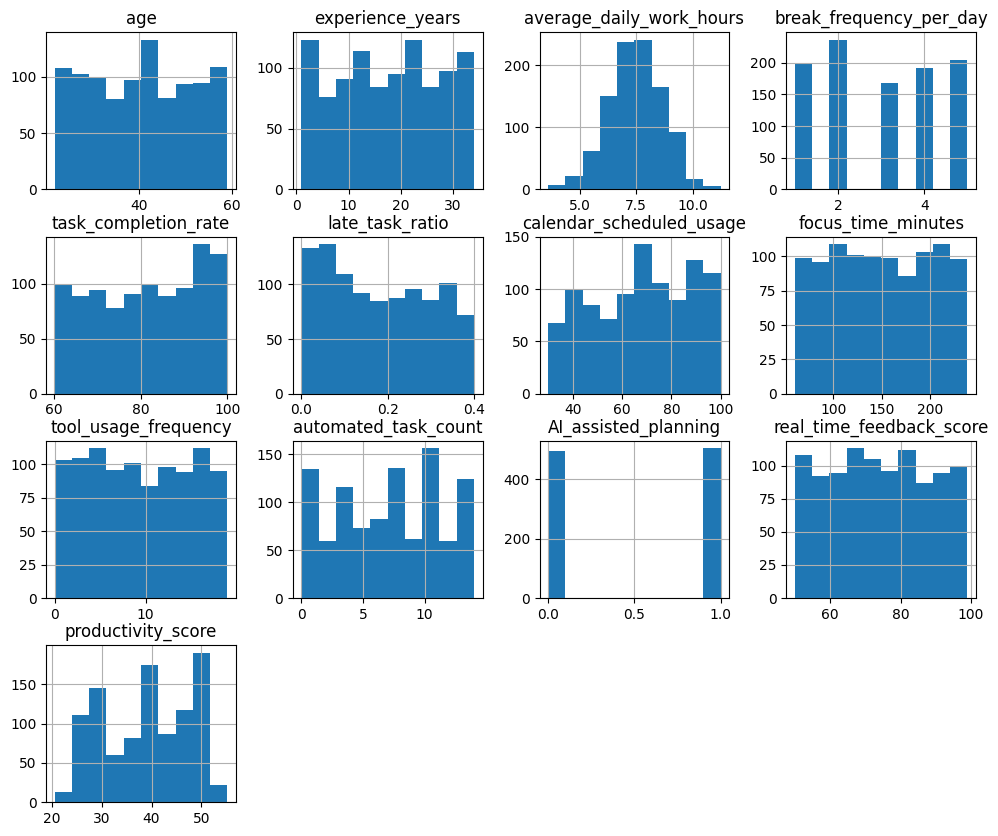

In [16]:
#Looking into the distribution of the data
df.hist(bins=10, figsize=(12, 10))

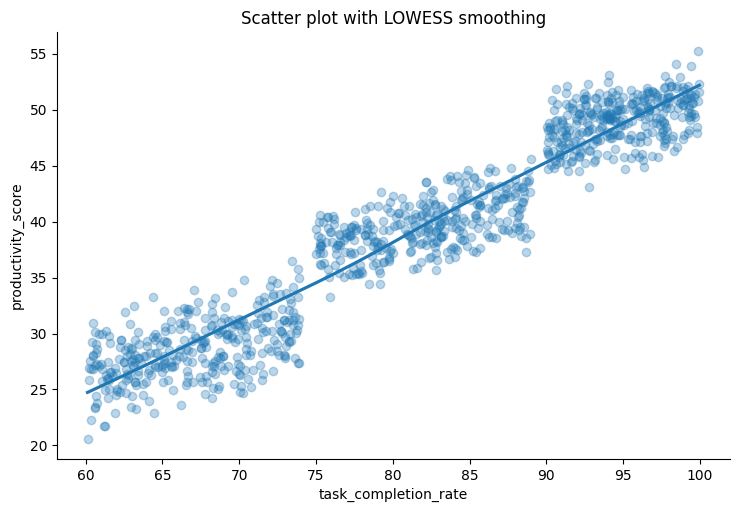

In [12]:
#Necessary import
import statsmodels
sns.lmplot(x='task_completion_rate', y='productivity_score', data=df, lowess=True, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title('Scatter plot with LOWESS smoothing')
plt.show()


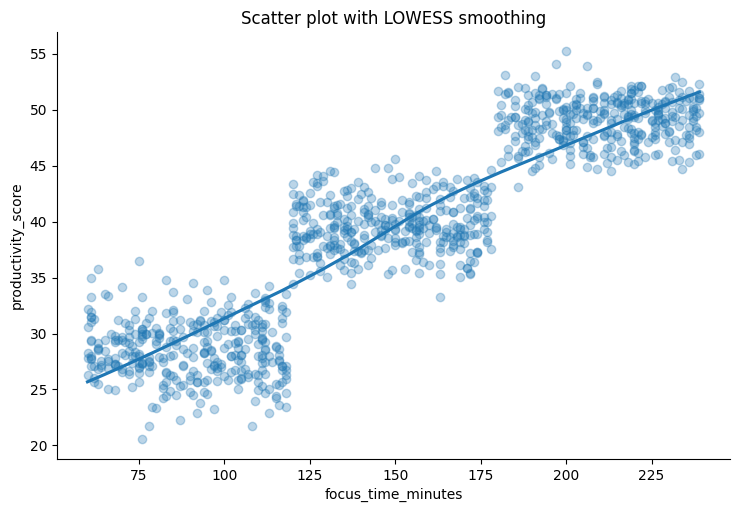

In [33]:
#Focus time minutes.
#Necessary import
import statsmodels
sns.lmplot(x='focus_time_minutes', y='productivity_score', data=df, lowess=True, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title('Scatter plot with LOWESS smoothing')
plt.show()


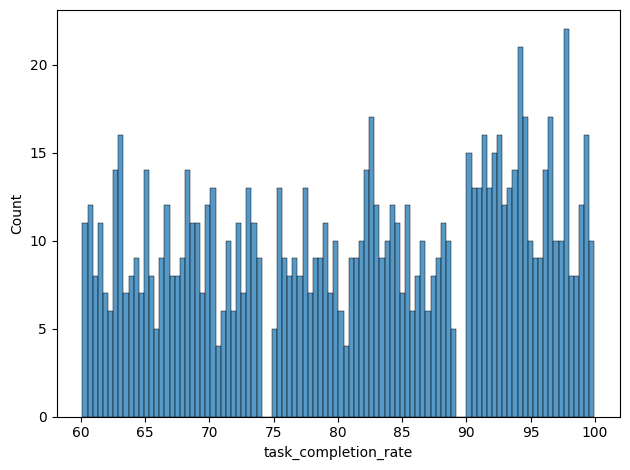

In [18]:
#Looking into the gaps of my dataset.
sns.histplot(data=df, x='task_completion_rate', bins=100)
plt.tight_layout()
plt.grid(False)
plt.show()

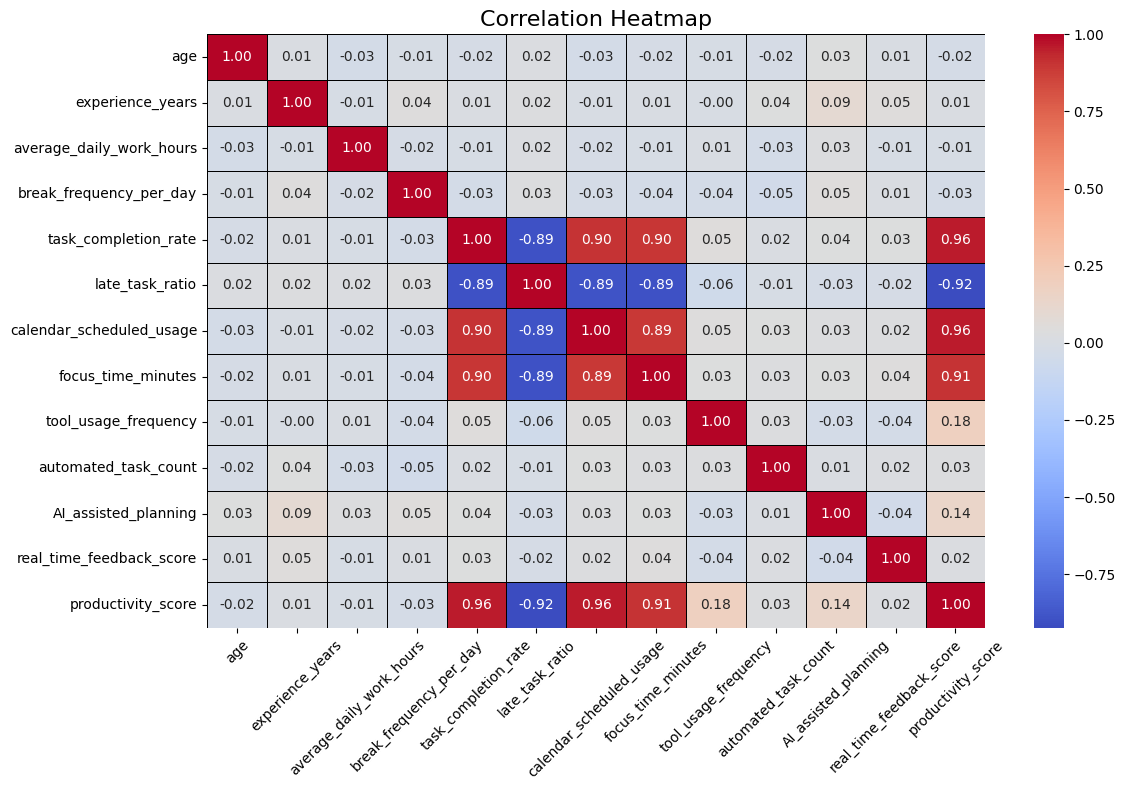

In [24]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, linecolor='black')

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


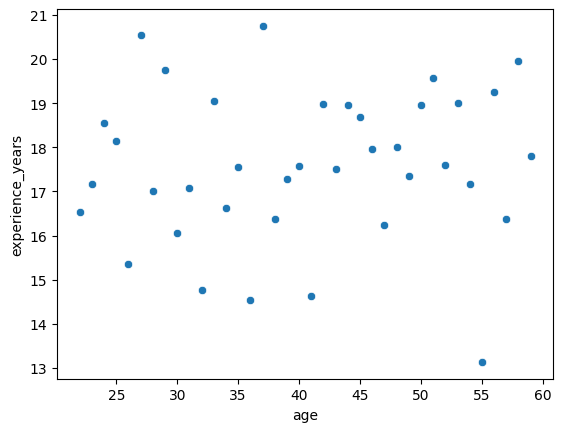

In [30]:
sns.scatterplot(data=df.groupby('age')['experience_years'].mean().round(2).reset_index(), x='age', y='experience_years')
plt.show()

In [36]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.shape[1]

13

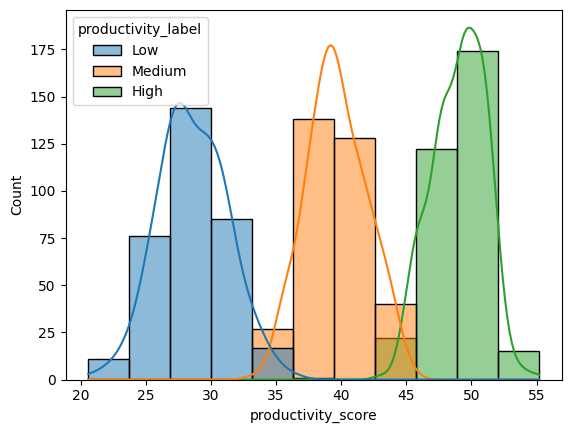

In [37]:
#Distribution of our target label
sns.histplot(data=df, x='productivity_score', kde=True, hue='productivity_label')
plt.show()